# Data validation

Date:  2020-07-16

Author:  Blane Grann

For data applications, it is important to validate that the test data belongs to the same distribution as the training data.  When test data belongs to a different distribution than the training data, this may indicate that the test data was generated from a different process.  Examples of a 'different process' for data generation can include things like:
- a new measurement device returning different units
- a measurement error (e.g. a sensor that has become uncalibrated, sensor failure)
- a change in the cause-effect chain producing the data (e.g. a treatment that reduces the indcidence of cancer)

In data applications, one should be cautious when using test data that is from a different distribution than the training data because the algorithms used in the application are not likely to be equipped to extrapolate using data generated from a different process.  

In this notebook we demonstrate two simple methods for validating whether training and test data are from the same distribution.

In [1]:
import numpy as np
from scipy.stats import ks_2samp
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# configuration
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
plt.rc("axes.spines", top=False, right=False)

## Initializing our data

In [3]:
training_data = np.random.normal(10, 3, 1000)
test_data = np.random.lognormal(mean=np.log(10), sigma=np.log(2), size=1000)

## Comparing histograms

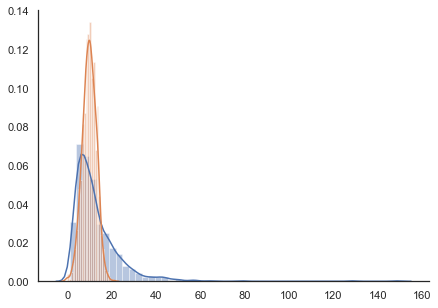

In [4]:
sns.distplot(test_data)
sns.distplot(training_data)

Visually, it is clear that this data has different distributions even if the average values are similar.

There are many distance metrics than can be used to evaluate the similarity of histograms.  The manhattan distance between two histograms is defined as:
$$\sum_{bin=i}^{n} \lvert histogram_1(bin) - histogram_2(bin) \rvert$$

Where n is the number of bins in each histogram.



Manhattan distance: 0.21140777040540457


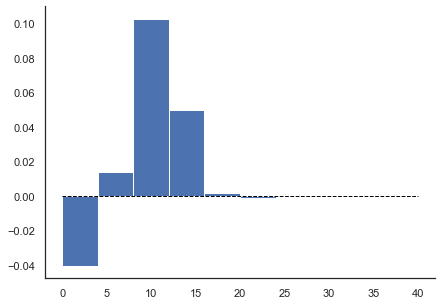

In [5]:
test_hist = np.histogram(test_data, bins=10, range=[0,80], density=True)
train_hist = np.histogram(training_data, bins=10, range=[0, 40], density=True)

hist_subtraction = train_hist[0] - test_hist[0]
result = plt.bar(x=train_hist[1][0:-1], height=hist_subtraction, width=4, align='edge')
plt.hlines(0, 0, 40, color='black', linestyles='dashed', linewidth=1)
manhattan_distance = np.sum(np.absolute(hist_subtraction))
print(f"Manhattan distance: {manhattan_distance}")

## Kolmogorov–Smirnov test

The [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) is another approach used to evaluate whether two samples have been drawn from the same distribution.  The Kolmogorov-Smirnov statistic for a training and testing data of a feature $x$ is the maximum vertical distance between the empirical cumulative distribution function ($ecdf$) of these datasets.  
$$max \lvert train_{ecdf}(x) - test_{ecdf}(x) \rvert$$

Note:  when comparing an parametric distribution function with an empirical distribution function, technically we should take the supremum rather than the maximum to account for the fact that a parametric distribution may be defined to infinity.

If the KS statistic is large, it is more likely that the data is are from different distributions and the p-value of the Komogorove-Smirnov test is the probability that the data could be sampled from the same distribution.

In [6]:
def plot_ecdf(values, label, color=None, linewidth=1):
    x = np.sort(values)
    y = np.arange(len(x))/float(len(x))
    sns.lineplot(x, y, label=label, color=color, linewidth=linewidth)
    return x, y

Ks_2sampResult(statistic=0.242, pvalue=4.2252283893369713e-26)


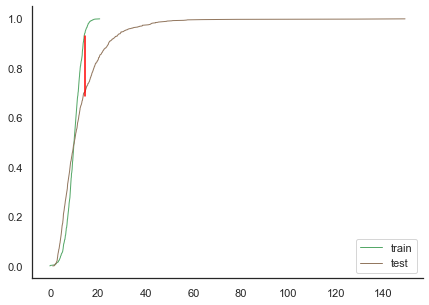

In [7]:
train_xy = plot_ecdf(training_data, 'train')
test_xy = plot_ecdf(test_data, 'test')
ks = ks_2samp(training_data, test_data)
plt.plot([14.5, 14.5], [0.93-ks[0], 0.93], color='red')
print(ks_2samp(training_data, test_data))

Thet p-value tells us the likelihood that the training data could be from the same distribution as the test data (based on the magnitude of the ks-statistic). 

Let's illustrate the ks-statistic by comparing the training data with a few other distributions.

Ks_2sampResult(statistic=0.07, pvalue=0.014870029418858987)


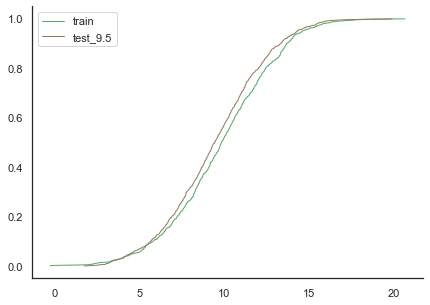

In [8]:
# same distribution, different mean, same SD
test_data_normal_9_5 = np.random.normal(9.5, 3, 1000)
plot_ecdf(training_data, 'train')
plot_ecdf(test_data_normal_9_5, 'test_9.5')
print(ks_2samp(training_data, test_data_normal_9_5))

Ks_2sampResult(statistic=0.059, pvalue=0.06153429181321559)


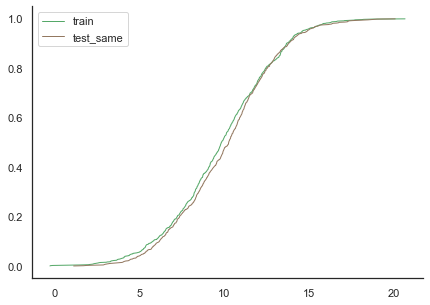

In [9]:
# same distribution, same mean, same SD
test_data_same = np.random.normal(10, 3, 1000)
plot_ecdf(training_data, 'train')
plot_ecdf(test_data_same, 'test_same')
print(ks_2samp(training_data, test_data_same))

Under the hood, whether the magnitude of the ks-statistic implies the distributions are different depends on the number of samples.  With fewer samples, a larger ks-statistic is needed to give the same p-value.

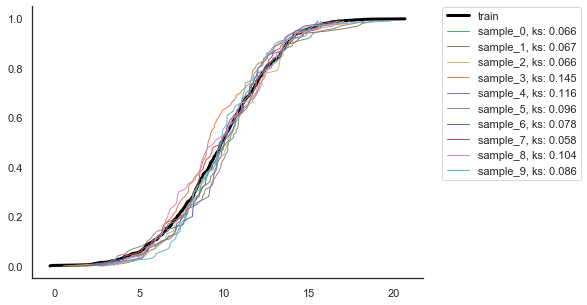

In [10]:
plot_ecdf(training_data, 'train', color='black', linewidth=3)
for i in range(10):
    sample = np.random.normal(10, 3, 100)
    ks = ks_2samp(training_data, sample)
    plot_ecdf(sample, f'sample_{i}, ks: {ks[0]}')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

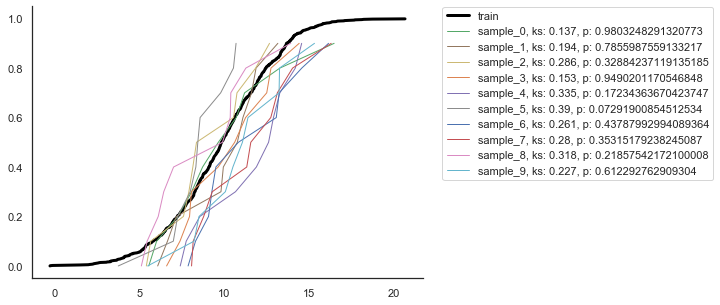

In [11]:
plot_ecdf(training_data, 'train', color='black', linewidth=3)
for i in range(10):
    sample = np.random.normal(10, 3, 10)
    ks = ks_2samp(training_data, sample)
    plot_ecdf(sample, f'sample_{i}, ks: {ks[0]}, p: {ks[1]}')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)